In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("csvFiles/ds_salaries.csv")

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
#Checking the years for relevant data
df['work_year'].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

In [7]:
#Checking different job position names
df['job_title'].value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

## Visualizations for the two claims ##

#### Claim 1: The Average Entry-Level Salary for a Data Scientist is $104,556. ####

In [6]:
dataScientists = df[df['job_title'] == 'Data Scientist']

In [7]:
dataScientists = dataScientists[dataScientists['experience_level'] == 'EN']

Text(0.5, 0, 'Salary ($)')

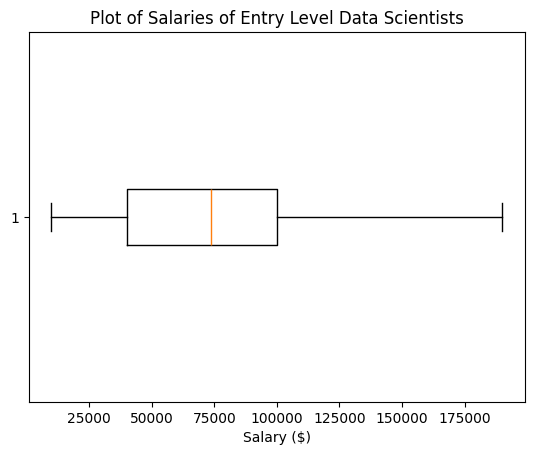

In [8]:
plt.boxplot(dataScientists['salary_in_usd'], vert=False)
plt.title('Plot of Salaries of Entry Level Data Scientists')
plt.xlabel('Salary ($)')

#### Claim 2: Big Companies offer bigger salaries than small companies/startups. ####

In [9]:
dataScientistOverall = df[df['job_title'] == 'Data Scientist']

In [10]:
bigCompany = dataScientistOverall[dataScientistOverall['company_size'] == 'L']
smallCompany = dataScientistOverall[dataScientistOverall['company_size'] == 'S']


In [11]:
bigCompanyMean = np.mean(bigCompany['salary_in_usd'])
smallCompanyMean = np.mean(smallCompany['salary_in_usd'])

Text(0.5, 1.0, 'Comparison of Salaries vs Size of Companies')

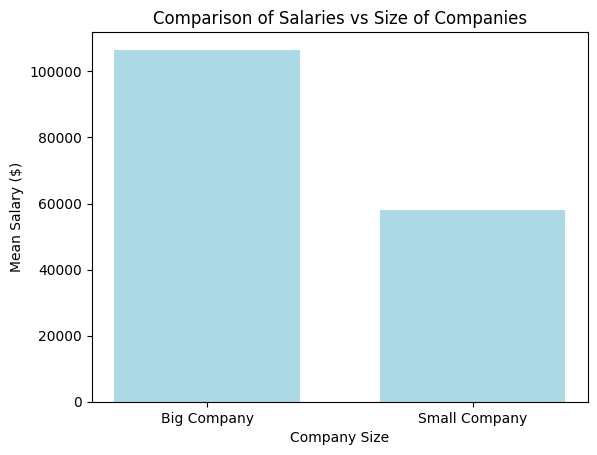

In [12]:
x = ['Big Company', 'Small Company']
y = [bigCompanyMean, smallCompanyMean]

plt.bar(x, y, color = 'lightblue', width = 0.7)
plt.xlabel('Company Size')
plt.ylabel('Mean Salary ($)')
plt.title('Comparison of Salaries vs Size of Companies')

## Calculations for the hypothesis testing ##

In [13]:
dataScientists.salary_in_usd.describe()

count        59.000000
mean      74085.966102
std       44628.963978
min        9727.000000
25%       39920.500000
50%       73742.000000
75%      100000.000000
max      190000.000000
Name: salary_in_usd, dtype: float64

In [71]:
bigCompany.salary_in_usd.describe()

count        99.000000
mean     106549.888889
std       66475.484183
min        9727.000000
25%       53304.000000
50%      103691.000000
75%      154000.000000
max      412000.000000
Name: salary_in_usd, dtype: float64

In [14]:
smallCompany.salary_in_usd.describe()

count        28.000000
mean      58167.785714
std       32636.808268
min        5679.000000
25%       38030.750000
50%       54817.000000
75%       83809.500000
max      120000.000000
Name: salary_in_usd, dtype: float64